<a href="https://colab.research.google.com/github/laiananardi/ML_challenge_wine_quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


In [151]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to downloaded file
local = '/content/drive/MyDrive/Machine learning/modulo01/desafio/winequality-red.csv'

# Read the csv with pandas
df = pd.read_csv(local, sep=';')

print('DataFrame')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Data Processing**

In [152]:
print('shape')
df.shape

shape


(1599, 12)

In [153]:
#counting the number of null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [154]:
# showing the "characteristics" of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [155]:
#analyzing the "dataset statistics"
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [156]:
#calculating the median
df.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

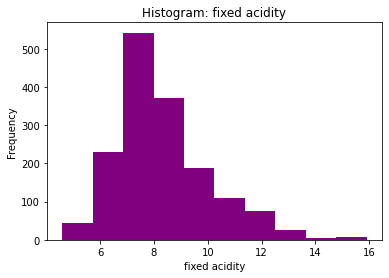

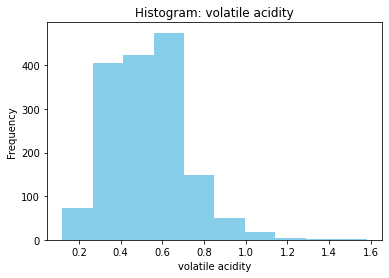

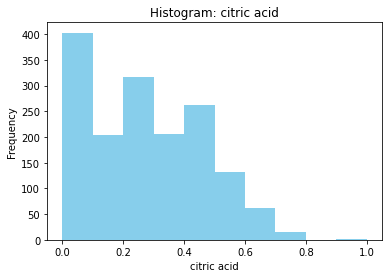

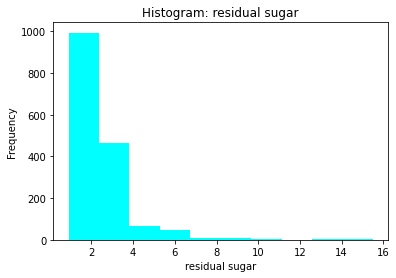

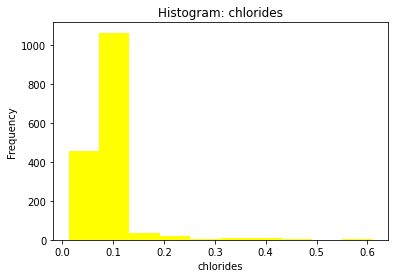

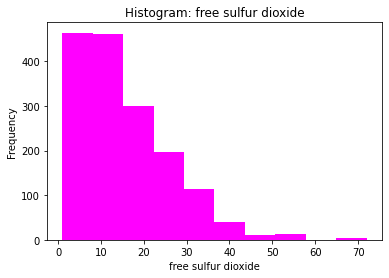

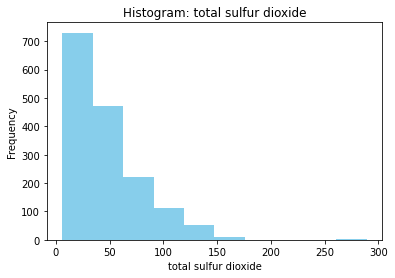

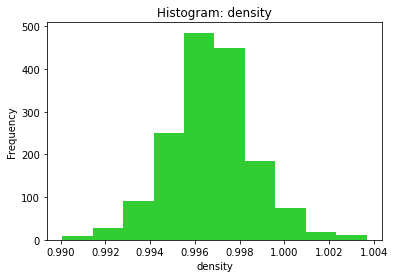

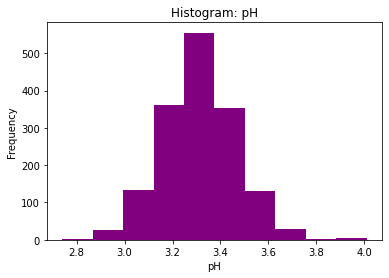

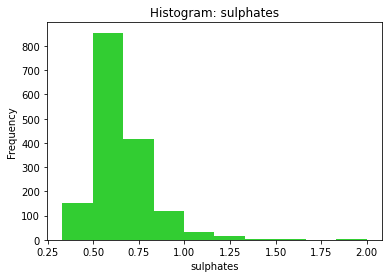

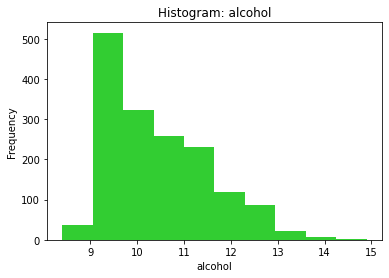

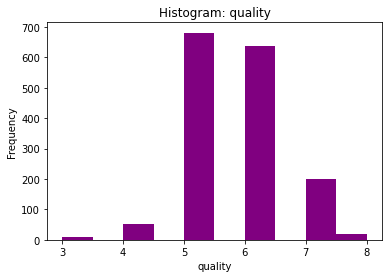

In [157]:

#Drawing histograms

colors = ['cyan', 'purple', 'magenta', 'limegreen', 'yellow', 'mediumblue', 'skyblue' ]

for col in df:
  data = df[f'{col}']
  bins = 10
  color = random.choice(colors)
  plt.hist(data,bins, color = f"{color}")
  plt.title(f"Histogram: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.show()



In [158]:
df_mean = df.groupby(['quality']).mean()
print(df_mean)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599 

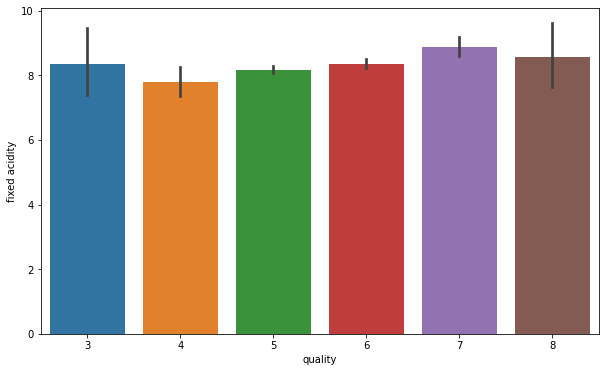

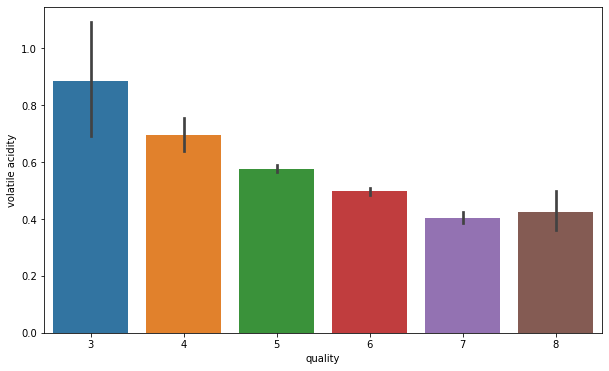

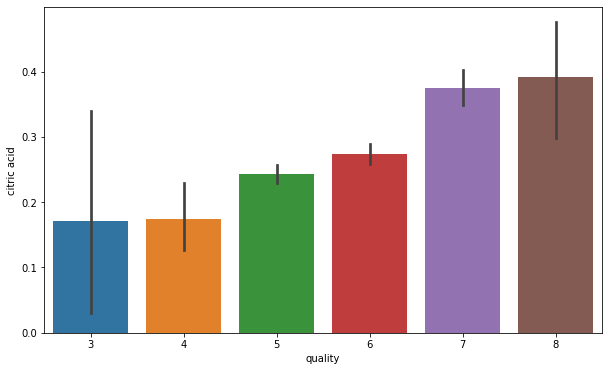

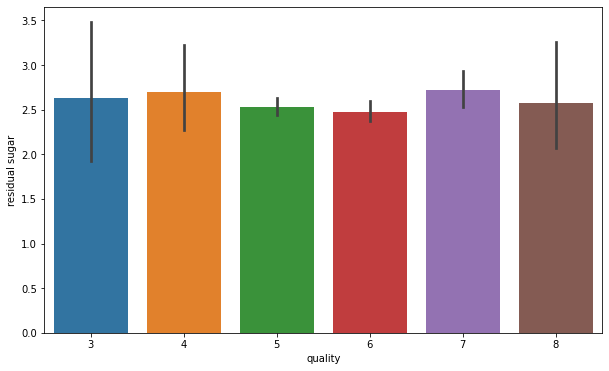

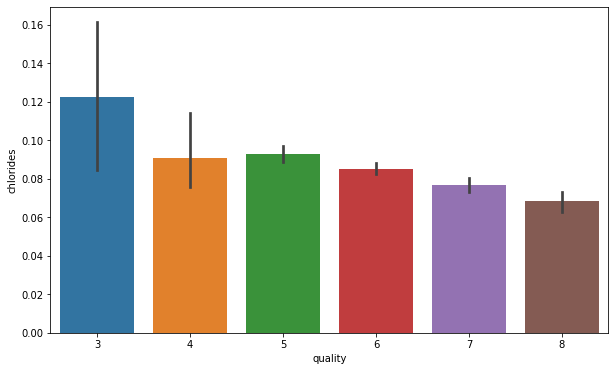

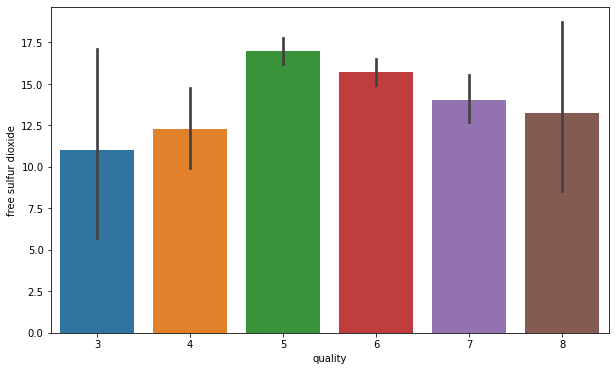

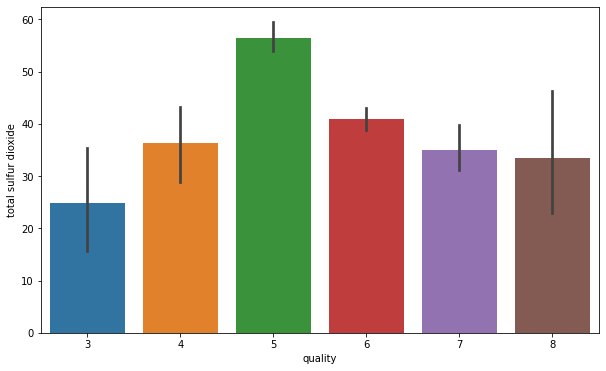

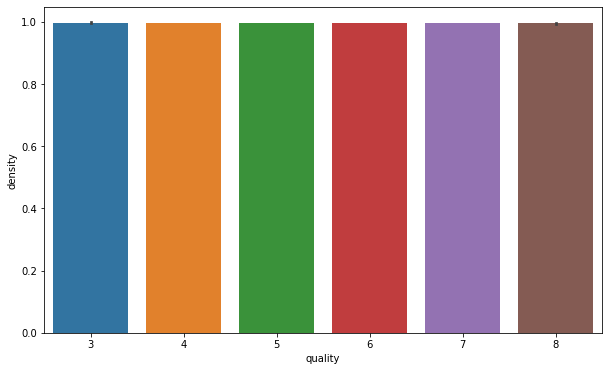

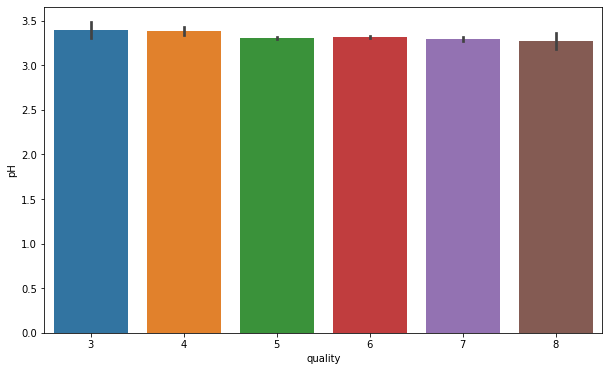

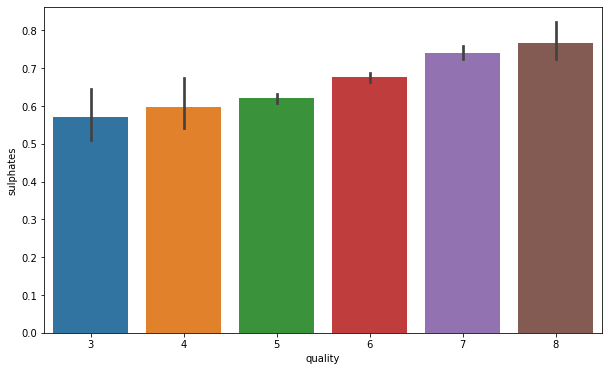

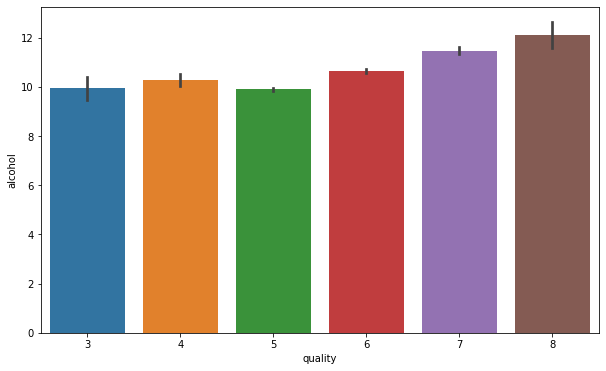

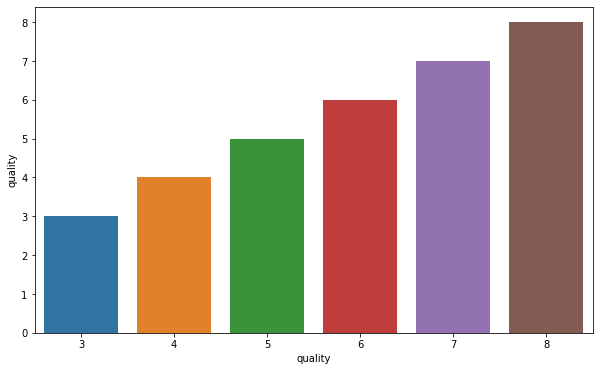

In [159]:

for col in df:
  fig = plt.figure(figsize = (10,6))
  sns.barplot(x = 'quality', y = f'{col}', data = df)

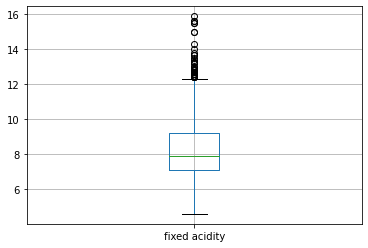

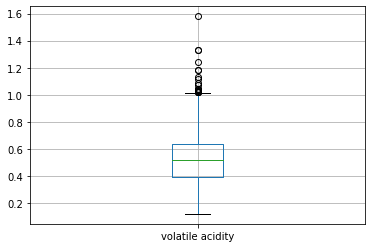

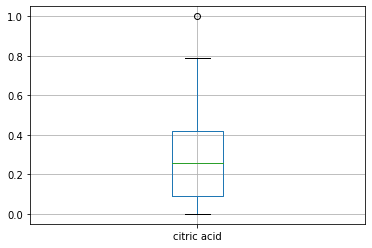

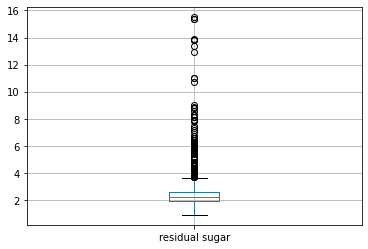

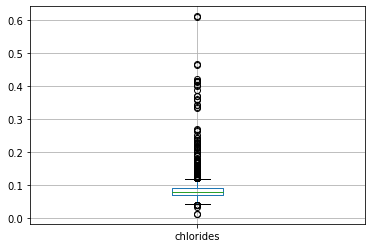

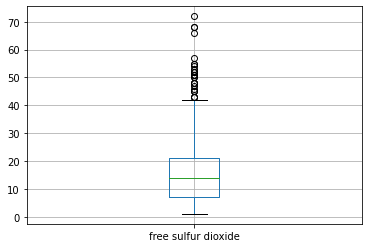

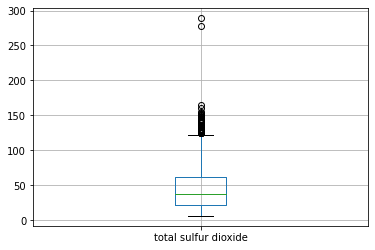

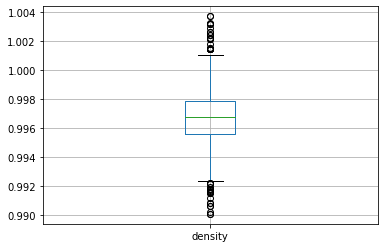

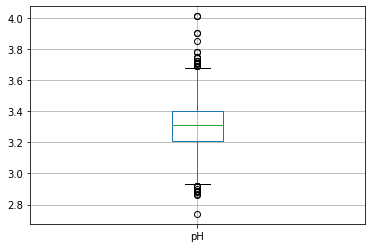

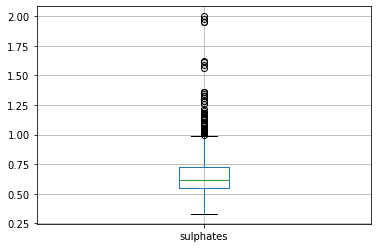

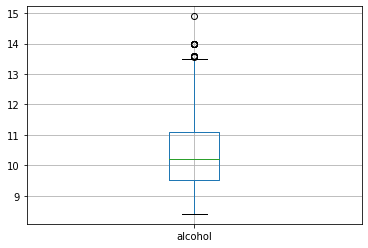

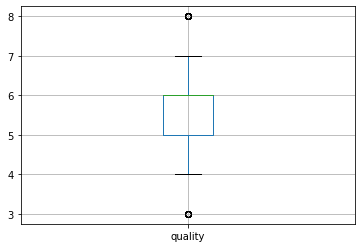

In [160]:
#Drawing boxplot
for col in df:
    plt.figure()
    df.boxplot([col])

In [161]:
#Identidy outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [162]:
#drop outliers

for col in df:
  print(col)
  lowerbound,upperbound = outlier_treatment(df[f'{col}'])
  print(f'Lowerbound: {lowerbound}')
  print(f'Upperbound: {upperbound}')
  df.drop(df[ (df[f'{col}'] > upperbound) | (df[f'{col}'] < lowerbound) ].index , inplace=True)

print(df.shape)

fixed acidity
Lowerbound: 3.95
Upperbound: 12.349999999999998
volatile acidity
Lowerbound: 0.027500000000000024
Upperbound: 1.0075
citric acid
Lowerbound: -0.3899999999999999
Upperbound: 0.8899999999999999
residual sugar
Lowerbound: 0.8499999999999996
Upperbound: 3.6500000000000004
chlorides
Lowerbound: 0.04150000000000002
Upperbound: 0.11749999999999998
free sulfur dioxide
Lowerbound: -11.5
Upperbound: 40.5
total sulfur dioxide
Lowerbound: -31.625
Upperbound: 113.375
density
Lowerbound: 0.9924249999999999
Upperbound: 1.0005450000000002
pH
Lowerbound: 2.96
Upperbound: 3.6800000000000006
sulphates
Lowerbound: 0.3137500000000001
Upperbound: 0.94375
alcohol
Lowerbound: 7.25
Upperbound: 13.25
quality
Lowerbound: 3.5
Upperbound: 7.5
(1124, 12)


In [163]:
#drop duplicated

df = df.drop_duplicates()

print(df.shape)

(949, 12)


**Pearson's Correlation**


Pearson's correlation evaluates the linear relationship between two continuous variables

Positive correlation: indicates that the relationship between two variables
happens in the same direction, that is, if one variable increases the other
must also increase and if one decreases the other will also be reduced.



Negative correlation: indicates that the linear relationship between two variables
occurs in opposite directions, that is, if one variable is increased, the other must decrease and if one decrease the other must increase.


Zero correlation: demonstrates that there is no linear indication between the
variables


[font1](https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/#:~:text=Pearson%20correlation%3A%20Pearson%20correlation%20evaluates,relationship%20between%20two%20continuous%20variables.&text=The%20Spearman%20correlation%20coefficient%20is,rather%20than%20the%20raw%20data.)

[font2](https://www.questionpro.com/blog/pt-br/correlacao-de-pearson/)

correlation between fixed acidity and pH: -0.6964729572858025
correlation between quality and alcohol: 0.4819665684642889
correlation between all columns:                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.276458     0.656880   
volatile acidity          -0.276458          1.000000    -0.638937   
citric acid                0.656880         -0.638937     1.000000   
residual sugar             0.219670          0.027045     0.139782   
chlorides                  0.160497          0.143094     0.054519   
free sulfur dioxide       -0.148450         -0.018137    -0.074669   
total sulfur dioxide      -0.084009          0.081066     0.002339   
density                    0.592353          0.061153     0.281599   
pH                        -0.696473          0.235158    -0.483654   
sulphates                  0.168673         -0.330963     0.267796   
alcohol                   -0.007608         -0.241128     0.160112   
quali

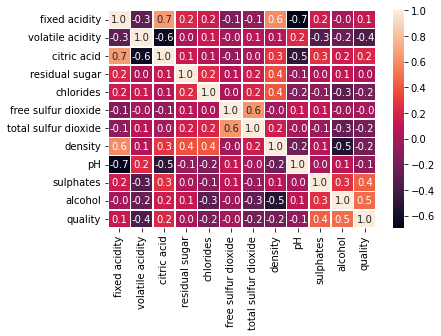

In [164]:
#Pearson's correlation coefficient
import seaborn as sn

# correlation analysis

#correlation between two columns
correlationfp = df['fixed acidity'].corr(df['pH'], method='pearson')
print(f'correlation between fixed acidity and pH: {correlationfp}')

correlationqa = df['quality'].corr(df['alcohol'], method='pearson')
print(f'correlation between quality and alcohol: {correlationqa}')

#correlation between all columns
correlation = df.corr(method='pearson')
print(f'correlation between all columns: {correlation}')

# plot the correlation matrix of all columns
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [165]:
# distinct values ​​of the quality column
distinct = df['quality'].value_counts()
print(distinct)

#instances for quality with value 5
print(df['quality'].value_counts()[5])


5    411
6    398
7    108
4     32
Name: quality, dtype: int64
411


In [166]:
#binary

df['quality'] = df['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 1,
        7 : 1,
        8 : 1         
})

#or

# df.loc[df.quality>5, 'qualitybin'] = 1
# df.loc[df.quality<=5, 'qualitybin'] = 0


print(df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


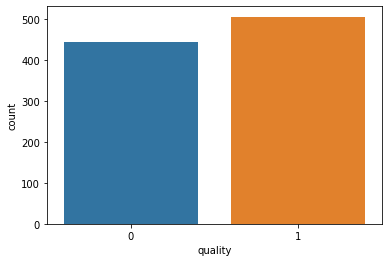

In [167]:
sns.countplot(df['quality'])

### **KNN Algorithm (K — Nearest Neighbors)**

It's a supervised algorithm normally used to perform the
classification of instances in a dataset.

The algorithm is based on “how similar” one data (a vector) is to another. The training is formed by vectors of n dimensions.

[font](https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e)

In [168]:
#importing the libraries
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [169]:
# transform data into array

x = df.iloc[:, :-1].values # Input data

y = df.iloc[:,-1:].values  # outputs or target


In [170]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y= le.fit_transform(y)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
# perform data division between training and testing
from sklearn.model_selection import train_test_split  # function that performs dataset division
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42, shuffle=True) # 10% for test


**StandardScaler**


Standardize features by removing the mean and scaling to unit variance.

[font]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [172]:
# perform the data normalization process
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #object that normalizes the data
scaler.fit(x_train)  # perform data normalization

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**how to select the optimal K value?**

* There are no pre-defined statistical methods to find the most favorable value of K.
* Initialize a random K value and start computing.
* Choosing a small value of K leads to unstable decision boundaries.
* The substantial K value is better for classification as it leads to smoothening the decision boundaries.
* Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.

[font](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)



Minimum error:- 0.25263157894736843 at K = 30


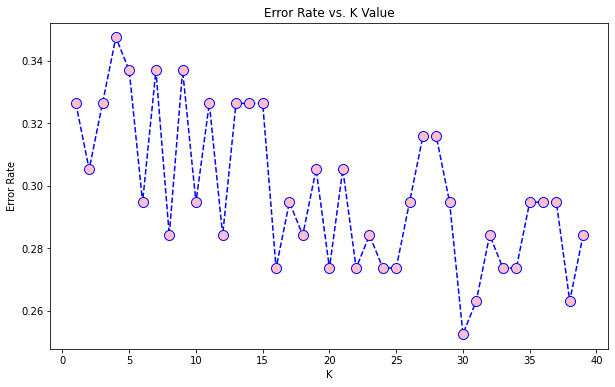

In [173]:
#let's improve the model and find out the optimal k value

# error rate vs k value
error_rate = []
for i in range(1,40):
 clf_KNN_e = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
 y_pred_e = clf_KNN_e.predict(x_test)
 error_rate.append(np.mean(y_pred_e != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='pink', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.7473684210526316 at K = 30


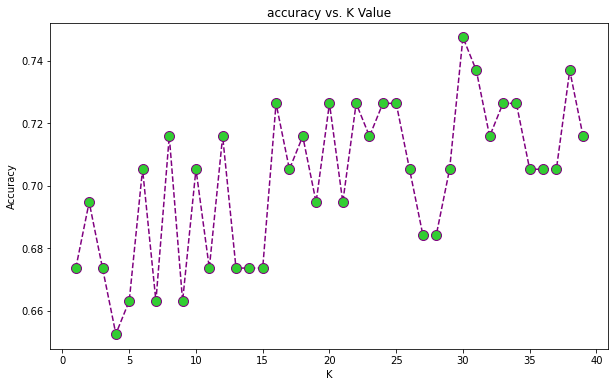

In [174]:
# accuracy rate vs k value

acc = []
#from sklearn import metrics
for i in range(1,40):
    clf_KNN_a = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_pred_a = clf_KNN_a.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_a))

# for j in acc: 
#   print(f'acc:{j}  k: {acc.index(j)}')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'purple',linestyle='dashed', 
         marker='o',markerfacecolor='limegreen', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [175]:
#train the model
clf_KNN = KNeighborsClassifier(n_neighbors=30) #uses building through 30 neighbors
clf_KNN.fit(x_train, y_train) # apply classification

KNeighborsClassifier(n_neighbors=30)

In [176]:
acc_knn = round(clf_KNN.score(x_test, y_test) * 100, 2)
print(acc_knn)
# perform the forecast
y_pred = clf_KNN.predict(x_test)

74.74


In [177]:
#build the classification report



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        50
           1       0.70      0.82      0.76        45

    accuracy                           0.75        95
   macro avg       0.75      0.75      0.75        95
weighted avg       0.76      0.75      0.75        95



In [178]:
#measure the accuracy
print("Wrong values predicted out of total values : ")
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

print(f'percentage Accuracy using KNN is : {100*accuracy_score(y_test,y_pred)}')

print(f'Erro rate: {100*np.mean(y_pred != y_test)}')


Wrong values predicted out of total values : 
24 / 95
percentage Accuracy using KNN is : 74.73684210526315
Erro rate: 25.263157894736842


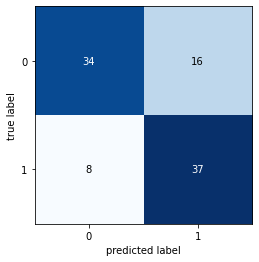

In [179]:


# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

[font](https://scikit-learn.org/stable/modules/tree.html)

In [180]:
from sklearn.tree import DecisionTreeClassifier # import the tree classifier
from sklearn import metrics # import metrics for evaluation


In [181]:
# Creates the classification object 
clf_dt = DecisionTreeClassifier()

# Perform classifier training
clf_dt = clf_dt.fit(x_train,y_train)

# Performs classification prediction
y_pred = clf_dt.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.76      0.75        50
           1       0.73      0.71      0.72        45

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95



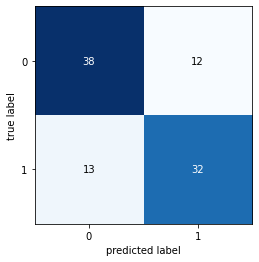

In [182]:
# Evaluating the model


# plot the confusion matrix

matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [183]:
#decision tree view
#import of the libraries needed to perform the decision tree view

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

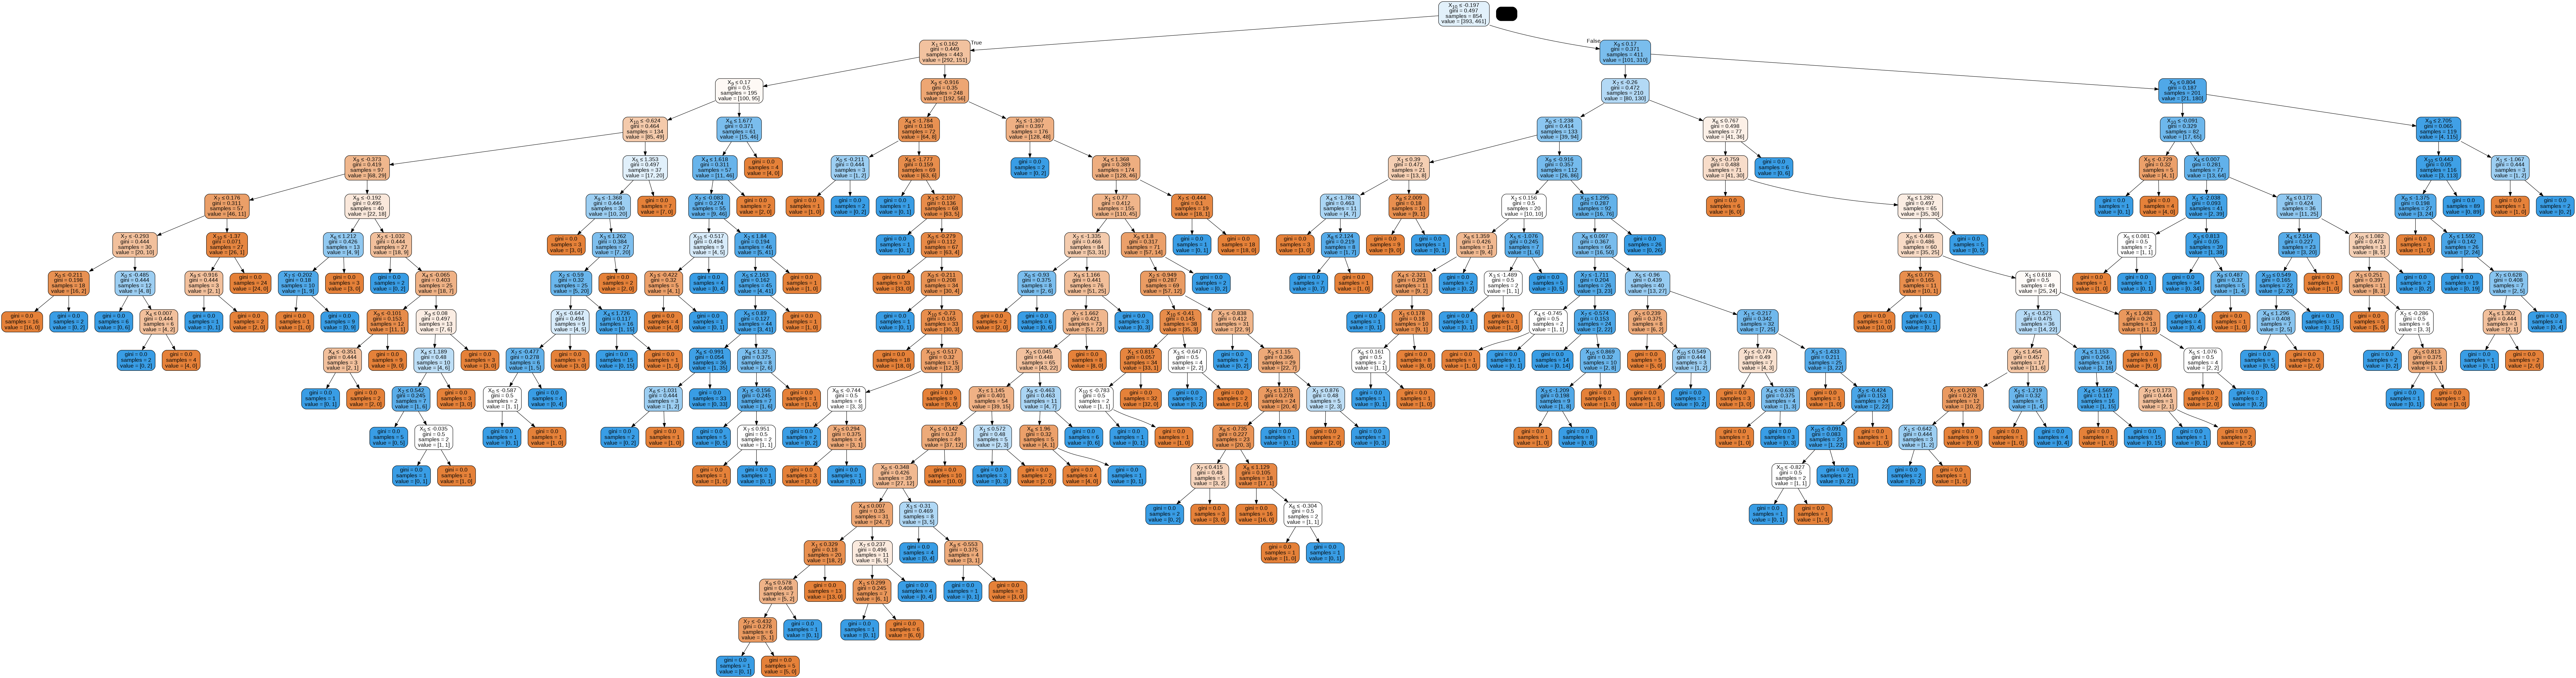

In [184]:
#Build the decision tree

dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Random forest
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

[font](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

In [185]:
from sklearn.ensemble import RandomForestClassifier


In [186]:
# Creates the classification object 
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# Perform classifier training
clf_floresta = clf_floresta.fit(x_train,y_train)

# Performs classification prediction
y_pred = clf_floresta.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        50
           1       0.73      0.71      0.72        45

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95



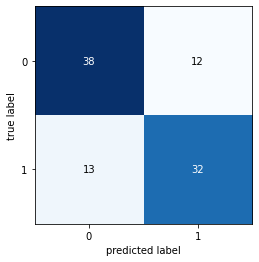

In [187]:
# Evaluating the model

# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Support Vector Machine(SVM) Algorithm


SVM is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

[font](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


In [188]:
#importing SVM library
from sklearn.svm import SVC

In [189]:
# Creates the classification object 
clf_svm = SVC()   

In [190]:
#Perform the classification
clf_svm.fit(x_train,y_train)

SVC()

In [191]:
#Perform the prediction
y_pred = clf_svm.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        50
           1       0.72      0.73      0.73        45

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95



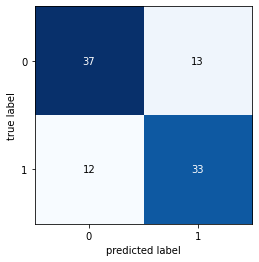

In [192]:
# Evaluating the model

# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### MLP Algorithm


MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

[font1](https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/)

[font2](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [193]:
#importing MLP library
from sklearn.neural_network import MLPClassifier

In [194]:
#set network configuration
clf_mlp = MLPClassifier(alpha=1e5, hidden_layer_sizes=(5, 5), random_state=1)

In [195]:
#Perform the model fit
clf_mlp.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=100000.0, hidden_layer_sizes=(5, 5), random_state=1)

In [196]:
#Perform the prediction
y_pred=clf_mlp.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.47      1.00      0.64        45

    accuracy                           0.47        95
   macro avg       0.24      0.50      0.32        95
weighted avg       0.22      0.47      0.30        95



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


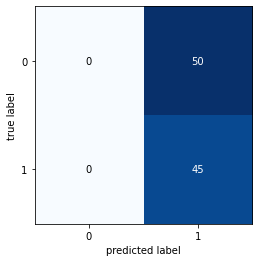

In [197]:
# Evaluating the model

# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()